In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


DATA_PATH = "./data/Polymer Tg SMILES.xlsx"

data = pd.read_excel(DATA_PATH)
data

,No,Polymer ID,Nama Polimer,SMILES,Tg
0,1,P010001,polyethylene,*C*,-120
1,2,P010002,polypropylene,*CC(C)*,0
2,3,P010003,polybutene,*CC(CC)*,-24
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30
...,...,...,...,...,...
1435,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75
1436,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63
1437,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6
1438,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53


In [2]:
data = data[data["Tg"] != "9,000,00"].copy()
data.reset_index(drop=True, inplace=True)

In [3]:
data["Tg"] = data["Tg"].astype(float)
data["Tg"].describe()

count    1433.00000
mean       85.59187
std        88.82163
min      -139.00000
25%        35.00000
50%        75.00000
75%       130.00000
max       420.00000
Name: Tg, dtype: float64

In [4]:
data["SMILES"].apply(lambda x: len(x)).describe()

count    1439.000000
mean       48.234190
std        27.807956
min         3.000000
25%        28.000000
50%        43.000000
75%        64.000000
max       170.000000
Name: SMILES, dtype: float64

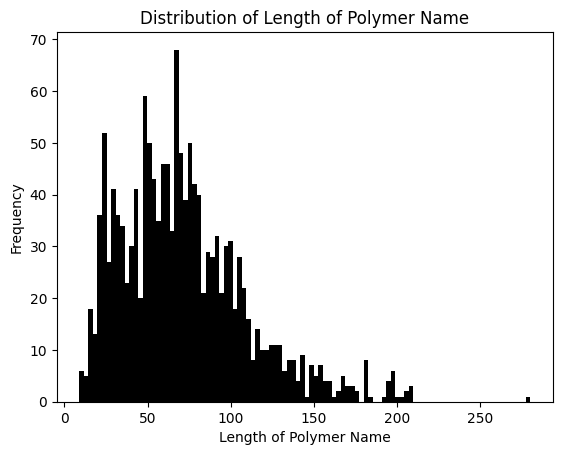

In [5]:
polimer_name_length = data["Nama Polimer"].apply(lambda x: len(x))
polimer_name_length.hist(bins=100, color="#000")
plt.xlabel("Length of Polymer Name")
plt.ylabel("Frequency")
plt.title("Distribution of Length of Polymer Name")
plt.grid(alpha=0)
plt.show()

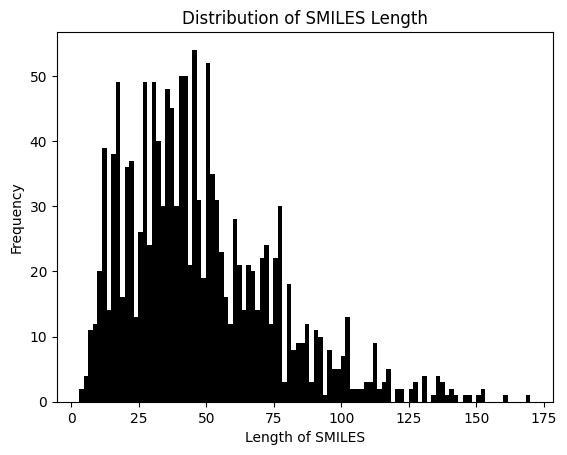

In [6]:
smiles_length = data["SMILES"].apply(lambda x: len(x))
smiles_length.hist(bins=100, color="#000")
plt.xlabel("Length of SMILES")
plt.ylabel("Frequency")
plt.title("Distribution of SMILES Length")
plt.grid(alpha=0)
plt.show()

In [7]:
data["SMILES"]

0                                                     *C*
1                                                 *CC(C)*
2                                                *CC(CC)*
3                                               CCCC(C*)*
4                                            *CC(CC(C)C)*
                              ...                        
1434               *CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*
1435        *CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*
1436       *CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*
1437    *CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...
1438    *CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...
Name: SMILES, Length: 1439, dtype: object

In [11]:
from collections import Counter


unique_chars = set()
for smiles in data["SMILES"]:
    unique_chars.update(set(smiles))

unique_chars = sorted(list(unique_chars))
print(f"There are {len(unique_chars)} unique characters in SMILES")


all_chars = "".join(data["SMILES"].dropna())
char_counts = Counter(all_chars)

# Convert to DataFrame for better visualization
char_counts_df = pd.DataFrame(char_counts.items(), columns=["Character", "Count"])
char_counts_df = char_counts_df.sort_values(by="Count", ascending=True)
char_counts_df.head()

There are 41 unique characters in SMILES


,Character,Count
40,a,1
38,G,1
39,e,1
35,I,1
30,0,6


In [17]:
import numpy as np

# Extract unique characters
unique_chars = sorted(set("".join(data["SMILES"].astype(str))))
char_to_index = {char: i for i, char in enumerate(unique_chars)}

# Define max length for padding
max_length = 200


# Function to convert SMILES to One-Hot Encoding
def smiles_to_ohe(smiles, char_to_index, max_length):
    ohe_matrix = np.zeros((max_length, len(char_to_index)), dtype=int)
    for i, char in enumerate(smiles[:max_length]):  # Truncate if longer than max_length
        if char in char_to_index:
            ohe_matrix[i, char_to_index[char]] = 1
    return ohe_matrix.flatten()  # Flatten to create a single-row feature vector


# Apply the transformation
data["OHE_Features"] = data["SMILES"].apply(
    lambda x: smiles_to_ohe(x, char_to_index, max_length).tolist()
)

# Convert into a DataFrame with separate columns
ohe_df = pd.DataFrame(
    data["OHE_Features"].to_list(),
    columns=[f"Char_{i}" for i in range(max_length * len(unique_chars))],
)

In [18]:
ohe_df

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_8190,Char_8191,Char_8192,Char_8193,Char_8194,Char_8195,Char_8196,Char_8197,Char_8198,Char_8199
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
processed_data = pd.concat([data, ohe_df], axis=1)
processed_data

,No,Polymer ID,Nama Polimer,SMILES,Tg,OHE_Features,Char_0,Char_1,Char_2,Char_3,...,Char_8190,Char_8191,Char_8192,Char_8193,Char_8194,Char_8195,Char_8196,Char_8197,Char_8198,Char_8199
0,1,P010001,polyethylene,*C*,-120.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,P010002,polypropylene,*CC(C)*,0.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,P010003,polybutene,*CC(CC)*,-24.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1435,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1436,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1437,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
processed_data = processed_data.dropna(subset=["Tg"])
processed_data.reset_index(drop=True, inplace=True)
processed_data

,No,Polymer ID,Nama Polimer,SMILES,Tg,OHE_Features,Char_0,Char_1,Char_2,Char_3,...,Char_8190,Char_8191,Char_8192,Char_8193,Char_8194,Char_8195,Char_8196,Char_8197,Char_8198,Char_8199
0,1,P010001,polyethylene,*C*,-120.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,P010002,polypropylene,*CC(C)*,0.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,P010003,polybutene,*CC(CC)*,-24.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,P010004,poly(pent-1-ene),CCCC(C*)*,-40.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,P010008,poly(4-methylpent-1-ene),*CC(CC(C)C)*,30.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1436,P522008,"poly(2,2,3,3,4,4,4-heptafluorobutyl 2-fluoroac...",*CC(C(=O)OCC(C(C(F)(F)F)(F)F)(F)F)(F)*,75.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1429,1437,P522009,"poly(2,2,3,3,4,4,5,5,5-nonafluoropentyl 2-fluo...",*CC(C(=O)OCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,63.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430,1438,P522016,"poly(3,3,4,4,5,5,6,6,6-nonafluorohexyl 2-fluor...",*CC(C(=O)OCCC(C(C(C(F)(F)F)(F)F)(F)F)(F)F)(F)*,6.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1431,1439,P522017,"poly(3,3,4,4,5,5,6,6,7,7,8,8,8-tridecafluorooc...",*CC(C(=O)OCCC(C(C(C(C(C(F)(F)F)(F)F)(F)F)(F)F)...,53.0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = processed_data.drop(columns=["No", "Polymer ID", "Nama Polimer", "SMILES", "Tg", "OHE_Features"])
X

,Char_0,Char_1,Char_2,Char_3,Char_4,Char_5,Char_6,Char_7,Char_8,Char_9,...,Char_8190,Char_8191,Char_8192,Char_8193,Char_8194,Char_8195,Char_8196,Char_8197,Char_8198,Char_8199
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1429,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1430,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1431,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
y = processed_data["Tg"]
y

0      -120.0
1         0.0
2       -24.0
3       -40.0
4        30.0
        ...  
1428     75.0
1429     63.0
1430      6.0
1431     53.0
1432     53.0
Name: Tg, Length: 1433, dtype: float64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.01, random_state=24
)

In [37]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.1, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

R2 Score: -0.050884559183383304
Mean Squared Error: 3842.2955018647344


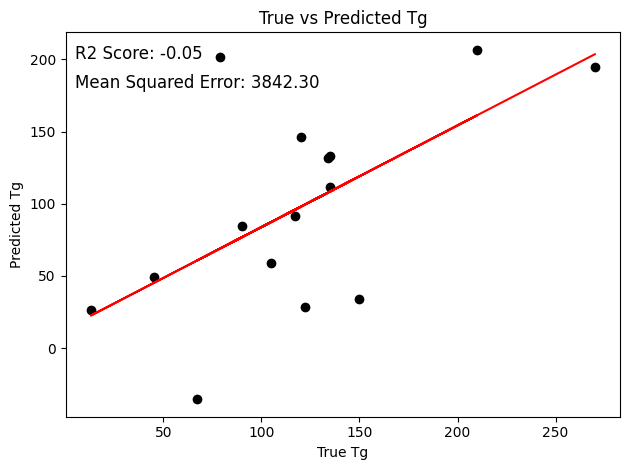

In [41]:
from sklearn.metrics import mean_squared_error, r2_score


r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")


plt.scatter(y_test, y_pred, color="black")
plt.xlabel("True Tg")
plt.ylabel("Predicted Tg")
plt.title("True vs Predicted Tg")

# regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color="red")

plt.text(5, 200, f"R2 Score: {r2:.2f}", fontsize=12)
plt.text(5, 180, f"Mean Squared Error: {mse:.2f}", fontsize=12)
plt.grid(alpha=0)
plt.tight_layout()
plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor


# Generating a random dataset for demonstration
np.random.seed(24)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=24
)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

# Fit and evaluate models
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

 98%|█████████▊| 41/42 [22:41<00:06,  6.87s/it] 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1644
[LightGBM] [Info] Number of data points in the train set: 1146, number of used features: 548
[LightGBM] [Info] Start training from score 83.929276


100%|██████████| 42/42 [22:43<00:00, 32.46s/it]


In [24]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,25075693571734090554017925188403855360.00,-693877758484977518525383437069464895488.00,2300445863508136951808.00,3.32
SGDRegressor,34928655285717725184.00,-966522300458636541952.00,2715041507565.87,1.23
LinearRegression,16.33,-423.33,1798.96,2.37
TransformedTargetRegressor,16.33,-423.33,1798.96,3.03
OrthogonalMatchingPursuit,1.66,-17.30,373.60,9.18
KernelRidge,1.24,-5.54,223.35,0.81
Ridge,1.20,-4.55,205.75,0.81
GaussianProcessRegressor,1.08,-1.11,126.89,47.19
RidgeCV,1.07,-0.91,120.67,1.39
